In [33]:
import gwaslab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sumstats = gl.Sumstats("../06_Association_tests/1kgeas.B1.glm.firth",fmt="plink2")

Thu Jan 12 13:27:03 2023 Start to load format from formatbook....
Thu Jan 12 13:27:03 2023  -plink2 format meta info:
Thu Jan 12 13:27:03 2023   - format_name  : PLINK2 .glm.firth, .glm.logistic,.glm.linear
Thu Jan 12 13:27:03 2023   - format_source  : https://www.cog-genomics.org/plink/2.0/formats
Thu Jan 12 13:27:03 2023   - format_version  : Alpha 3.3 final (3 Jun)
Thu Jan 12 13:27:03 2023   - last_check_date  :  20220806
Thu Jan 12 13:27:03 2023  -plink2 format dictionary:
Thu Jan 12 13:27:03 2023   - plink2 keys: ID,#CHROM,POS,REF,ALT,A1,OBS_CT,A1_FREQ,BETA,LOG(OR)_SE,SE,Z_STAT,P,LOG10_P,MACH_R2,OR,L95,U95
Thu Jan 12 13:27:03 2023   - gwaslab values: SNPID,CHR,POS,REF,ALT,EA,N,EAF,BETA,SE,SE,Z,P,MLOG10P,INFO,OR,OR_95L,OR_95U
Thu Jan 12 13:27:03 2023 Start to initiate from file :../06_Association_tests/1kgeas.B1.glm.firth
Thu Jan 12 13:27:04 2023  -Reading columns          : OBS_CT,Z_STAT,LOG(OR)_SE,A1,#CHROM,POS,REF,P,OR,ALT,ID
Thu Jan 12 13:27:04 2023  -Renaming columns to      :

In [3]:
sumstats.basic_check()

Thu Jan 12 13:27:06 2023 Start to check IDs...
Thu Jan 12 13:27:06 2023  -Current Dataframe shape : 1122299  x  11
Thu Jan 12 13:27:06 2023  -Checking if SNPID is chr:pos:ref:alt...(separator: - ,: , _)
Thu Jan 12 13:27:08 2023 Finished checking IDs successfully!
Thu Jan 12 13:27:08 2023 Start to fix chromosome notation...
Thu Jan 12 13:27:08 2023  -Current Dataframe shape : 1122299  x  11
Thu Jan 12 13:27:12 2023  -Vairants with standardized chromosome notation: 1122299
Thu Jan 12 13:27:14 2023  -All CHR are already fixed...
Thu Jan 12 13:27:16 2023 Finished fixing chromosome notation successfully!
Thu Jan 12 13:27:16 2023 Start to fix basepair positions...
Thu Jan 12 13:27:16 2023  -Current Dataframe shape : 1122299  x  11
Thu Jan 12 13:27:16 2023  -Converting to Int64 data type ...
Thu Jan 12 13:27:18 2023  -Position upper_bound is: 250,000,000
Thu Jan 12 13:27:21 2023  -Remove outliers: 0
Thu Jan 12 13:27:21 2023  -Converted all position to datatype Int64.
Thu Jan 12 13:27:21 2023 

In [4]:
sumstats.data

,SNPID,CHR,POS,EA,NEA,SE,Z,P,OR,N,STATUS
0,1:13273:G:C,1,13273,C,G,0.282835,-1.037730,0.299398,0.745645,503,9960099
1,1:14599:T:A,1,14599,A,T,0.240734,2.141070,0.032269,1.674360,503,9960099
2,1:14604:A:G,1,14604,G,A,0.240734,2.141070,0.032269,1.674360,503,9960099
3,1:14930:A:G,1,14930,G,A,0.242987,2.058060,0.039584,1.648860,503,9960099
4,1:69897:T:C,1,69897,T,C,0.199926,2.628700,0.008571,1.691380,503,9960099
...,...,...,...,...,...,...,...,...,...,...,...
1122294,22:51213613:C:T,22,51213613,T,C,0.263798,-0.988672,0.322824,0.770427,503,9960099
1122295,22:51222965:G:A,22,51222965,A,G,0.142780,-1.196640,0.231446,0.842943,503,9960099
1122296,22:51228910:G:A,22,51228910,A,G,0.144347,-1.005500,0.314655,0.864900,503,9960099
1122297,22:51233666:C:T,22,51233666,T,C,0.162237,1.168840,0.242470,1.208800,503,9960099


In [5]:
locus = sumstats.filter_value('CHR==2 & POS>54531536 & POS<56731536')

Thu Jan 12 13:27:27 2023 Start filtering values by condition: CHR==2 & POS>54531536 & POS<56731536
Thu Jan 12 13:27:27 2023  -Removing 1121387 variants not meeting the conditions: CHR==2 & POS>54531536 & POS<56731536
Thu Jan 12 13:27:27 2023 Finished filtering values.


In [6]:
locus.fill_data(to_fill=["BETA"])

Thu Jan 12 13:27:27 2023 Start filling data using existing columns...
Thu Jan 12 13:27:27 2023  -Raw input columns:  ['SNPID', 'CHR', 'POS', 'EA', 'NEA', 'SE', 'Z', 'P', 'OR', 'N', 'STATUS']
Thu Jan 12 13:27:27 2023  -Overwrite mode:  False
Thu Jan 12 13:27:27 2023   -Skipping columns:  []
Thu Jan 12 13:27:27 2023  -Filling columns:  ['BETA']
Thu Jan 12 13:27:27 2023   - Filling BETA value using OR column...
Thu Jan 12 13:27:27 2023 Start to reorder the columns...
Thu Jan 12 13:27:27 2023  -Current Dataframe shape : 898  x  12
Thu Jan 12 13:27:27 2023  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
Thu Jan 12 13:27:27 2023 Finished sorting columns successfully!
Thu Jan 12 13:27:27 2023 Finished filling data using existing columns.


In [7]:
locus.data

,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS
110292,2:54535206:C:T,2,54535206,T,C,0.300290,0.142461,2.107860,0.035043,1.350250,503,9960099
110293,2:54536167:C:G,2,54536167,G,C,0.148851,0.246871,0.602952,0.546541,1.160500,503,9960099
110294,2:54539096:A:G,2,54539096,G,A,-0.003847,0.288489,-0.013335,0.989360,0.996160,503,9960099
110295,2:54540264:G:A,2,54540264,A,G,-0.153672,0.165879,-0.926409,0.354234,0.857553,503,9960099
110296,2:54540614:G:T,2,54540614,T,G,-0.153672,0.165879,-0.926409,0.354234,0.857553,503,9960099
...,...,...,...,...,...,...,...,...,...,...,...,...
111185,2:56704366:A:G,2,56704366,A,G,0.161379,0.137948,1.169870,0.242052,1.175130,503,9960099
111186,2:56707816:A:C,2,56707816,C,A,0.113962,0.264583,0.430722,0.666670,1.120710,503,9960099
111187,2:56713152:A:T,2,56713152,A,T,0.132676,0.142780,0.929240,0.352765,1.141880,503,9960099
111188,2:56723456:G:A,2,56723456,G,A,0.246039,0.139407,1.764910,0.077578,1.278950,503,9960099


In [8]:
locus.data.to_csv("sig_locus.tsv",sep="\t",index=None)

In [9]:
locus.data["SNPID"].to_csv("sig_locus.snplist",sep="\t",index=None,header=None)

In [10]:
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr

INFO:rpy2.situation:cffi mode is CFFI_MODE.ANY
INFO:rpy2.situation:R home found: /Library/Frameworks/R.framework/Resources
INFO:rpy2.situation:R library path: 
INFO:rpy2.situation:LD_LIBRARY_PATH: 
INFO:rpy2.situation:R exec path: /Library/Frameworks/R.framework/Resources/bin/R
INFO:rpy2.rinterface_lib.embedded:Default options to initialize R: rpy2, --quiet, --no-save
INFO:rpy2.rinterface_lib.embedded:R is already initialized. No need to initialize.


In [11]:
import rpy2.robjects.numpy2ri as numpy2ri
numpy2ri.activate()

In [12]:
# import susieR as object
susieR = importr('susieR')

In [13]:
ld = pd.read_csv("sig_locus_ld.mt.ld",sep="\t",header=None)

In [14]:
# convert pd.DataFrame to numpy
R_df = ld.values

In [15]:
R_df

array([[ 1.        , -0.145634  ,  0.252616  , ...,  0.00511469,
        -0.00130473, -0.00235459],
       [-0.145634  ,  1.        , -0.0916734 , ..., -0.0207491 ,
        -0.0271967 , -0.0135502 ],
       [ 0.252616  , -0.0916734 ,  1.        , ...,  0.0710813 ,
         0.064883  ,  0.060137  ],
       ...,
       [ 0.00511469, -0.0207491 ,  0.0710813 , ...,  1.        ,
         0.914523  ,  0.992823  ],
       [-0.00130473, -0.0271967 ,  0.064883  , ...,  0.914523  ,
         1.        ,  0.912845  ],
       [-0.00235459, -0.0135502 ,  0.060137  , ...,  0.992823  ,
         0.912845  ,  1.        ]])

In [29]:
df = locus.data.reset_index()

In [21]:
locus.data["BETA"].values.reshape((len(R_df),1))

array([[ 3.00289780e-01],
       [ 1.48850992e-01],
       [-3.84742115e-03],
       [-1.53672293e-01],
       [-1.53672293e-01],
       [-1.53672293e-01],
       [-4.95064519e-02],
       [-1.43382028e-01],
       [-1.53672293e-01],
       [-1.53672293e-01],
       [-9.46832821e-02],
       [-3.80321294e-02],
       [-1.96078166e-01],
       [-1.53672293e-01],
       [-1.53672293e-01],
       [-1.96078166e-01],
       [ 2.84938306e-01],
       [-2.13971943e-01],
       [ 4.24594313e-01],
       [ 3.26876402e-01],
       [ 3.26876402e-01],
       [-1.22696616e-01],
       [-1.15032725e-01],
       [-1.40529543e-01],
       [-1.40529543e-01],
       [-1.45470947e-01],
       [-1.61037669e-01],
       [ 3.88617277e-01],
       [ 1.00143924e-01],
       [-1.76800400e-01],
       [-1.88928142e-01],
       [ 3.81335616e-02],
       [-2.10116267e-01],
       [ 1.12113617e-01],
       [ 2.45867431e-01],
       [ 1.59436688e-01],
       [-3.48399341e-01],
       [-3.93586397e-01],
       [-3.9

In [22]:
fit = susieR.susie_rss(
    bhat = locus.data["BETA"].values.reshape((len(R_df),1)), 
    shat = locus.data["SE"].values.reshape((len(R_df),1)),
    R = R_df,
    L = 10,
    n = 503,
    verbose = True
)

[1] "objective:-243.635983131456"
[1] "objective:371.468867654033"
[1] "objective:1006.67298218874"
[1] "objective:1649.20518369175"
[1] "objective:2295.10331946146"
[1] "objective:2942.19691911295"
[1] "objective:3589.9315212356"
[1] "objective:4238.08766767909"
[1] "objective:4886.55989467849"
[1] "objective:5535.28098742992"
[1] "objective:6184.20335163364"
[1] "objective:6833.2918786073"
[1] "objective:7482.51991860561"
[1] "objective:8131.86676198083"
[1] "objective:8781.31599623375"
[1] "objective:9430.85439044486"
[1] "objective:10080.4711247729"
[1] "objective:10730.157236971"
[1] "objective:11379.9052195893"
[1] "objective:12029.708722049"
[1] "objective:12679.5623246793"
[1] "objective:13329.4613631719"
[1] "objective:13979.4017965716"
[1] "objective:14629.3801007473"
[1] "objective:15279.3931828136"
[1] "objective:15929.4383133273"
[1] "objective:16579.5130722229"
[1] "objective:17229.6153043692"
[1] "objective:17879.7430816953"
[1] "objective:18529.8946705361"
[1] "objectiv

In [23]:
fit

<rpy2.robjects.vectors.ListVector object at 0x7fcb3ff49380> [RTYPES.VECSXP]
R classes: ('susie',)
[FloatSexp..., FloatSexp..., FloatSexp..., FloatSexp..., ..., FloatSexp..., FloatSexp..., ListSexpV..., FloatSexp...]
  alpha: <class 'numpy.ndarray'>
  array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
  mu: <class 'numpy.ndarray'>
  array([[-3.32089387, -0.1366937 , -0.94159312, ..., -0.1096966 ,
         0.38209344, -0.02455391],
       [ 3.5255524 ,  0.19137124,  0.94512557, ...,  0.19341428,
        -0.22640528,  0.09981324],
       [-3.35317089, -0.13824033, -0.95048791, ..., -0.1111256 ,
         0.38496216, -0.02514023],
       ...,
       [ 3.54090501,  0.1921069 ,  0.94935639, ...,  0.19409398,
        -0.22776979,  0.10009213],
       [-3.35339221, -0.13825094, -0.9505489 , ..., -0.11113539,
         0.38498183, -0.02514425],
       [ 3.54090008,  0.19210666,  0.94935503, ...,  0.19409376,
        -0.22776935,  0.10009204]])
  mu2: <class 'numpy.ndarray'>
  array([[1.10303281e+01, 2.06771975e-02, 8.88589638e-01, ...,
        1.40253754e-02, 1.47987427e-01, 2.59492485e-03],
       [1.24315117e+01, 3.86149809e-02, 8.95254379e-01, ...,
        3.94011131e-02, 5.32513821e-02, 1.19547137e-02],
       [1.12457470e+01, 2.11024203e-02, 9.05419291e-01, ...,
        1.43409285e-02, 1.50187894e-01, 2.62406147e-03],
       ...,
       [1.25400003e+01, 3.88970905e-02, 9.03269587e-01, ...,
        3.96645034e-02, 5.38711085e-02, 1.20104641e-02],
       [1.12472313e+01, 2.11053525e-02, 9.05535238e-01, ...,
        1.43431063e-02, 1.50203039e-01, 2.62426363e-03],
       [1.25399654e+01, 3.88969997e-02, 9.03267009e-01, ...,
        3.96644187e-02, 5.38709090e-02, 1.20104462e-02]])
  KL: <class 'numpy.ndarray'>
  array([12.73070549, 13.14115311, 12.74006627, 13.1456158 , 12.74015333,
       13.14559983, 12.74013661, 13.14559437, 12.74013016, 13.14559295])
...
  lbf_variable: <class 'numpy.ndarray'>
  array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 

In [31]:
df

,index,SNPID,CHR,POS,EA,NEA,BETA,SE,Z,P,OR,N,STATUS,cs
0,110292,2:54535206:C:T,2,54535206,T,C,0.300290,0.142461,2.107860,0.035043,1.350250,503,9960099,0
1,110293,2:54536167:C:G,2,54536167,G,C,0.148851,0.246871,0.602952,0.546541,1.160500,503,9960099,0
2,110294,2:54539096:A:G,2,54539096,G,A,-0.003847,0.288489,-0.013335,0.989360,0.996160,503,9960099,0
3,110295,2:54540264:G:A,2,54540264,A,G,-0.153672,0.165879,-0.926409,0.354234,0.857553,503,9960099,0
4,110296,2:54540614:G:T,2,54540614,T,G,-0.153672,0.165879,-0.926409,0.354234,0.857553,503,9960099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,111185,2:56704366:A:G,2,56704366,A,G,0.161379,0.137948,1.169870,0.242052,1.175130,503,9960099,0
894,111186,2:56707816:A:C,2,56707816,C,A,0.113962,0.264583,0.430722,0.666670,1.120710,503,9960099,0
895,111187,2:56713152:A:T,2,56713152,A,T,0.132676,0.142780,0.929240,0.352765,1.141880,503,9960099,0
896,111188,2:56723456:G:A,2,56723456,G,A,0.246039,0.139407,1.764910,0.077578,1.278950,503,9960099,0


In [51]:
df["MLOG10P"] = -np.log10(df["P"])

In [42]:
df["cs"] = 0
n_cs=len(susieR.susie_get_cs(fit, coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0])
for i in range(n_cs):
    cs_index=susieR.susie_get_cs(fit,coverage = 0.95,min_abs_corr = 0.5,Xcorr = R_df)[0][i]
    df.loc[cs_index-1,"cs"] = i+1

In [43]:
df["pip"] = np.array(susieR.susie_get_pip(fit))

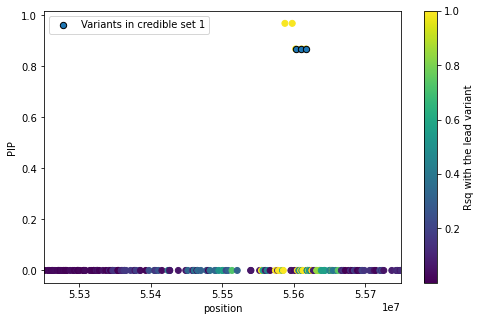

In [44]:
plt.figure(figsize=(8,5))
p=plt.scatter(df["POS"],df["pip"],c=ld[df["P"].idxmin()]**2)
plt.scatter(df.loc[df[df["cs"]==1].index,"POS"],df.loc[df[df["cs"]==1].index,"pip"],
           marker='o',s=40,c=None,edgecolors='black',label="Variants in credible set 1")
plt.colorbar( p , label="Rsq with the lead variant")
plt.xlabel("position")
plt.xlim((55250614, 55750614))
plt.ylabel("PIP")
plt.legend()

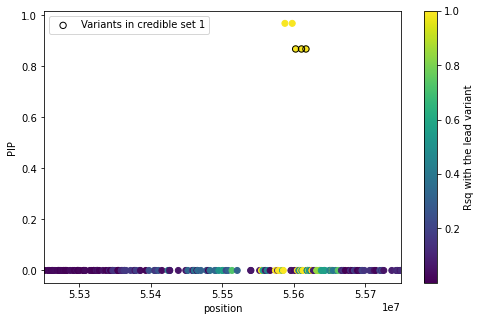

In [50]:
plt.figure(figsize=(8,5))
p=plt.scatter(df["POS"],df["pip"],c=ld[df["P"].idxmin()]**2)
plt.scatter(df.loc[df[df["cs"]==1].index,"POS"],df.loc[df[df["cs"]==1].index,"pip"],
           marker='o',s=40,c="None", edgecolors='black',label="Variants in credible set 1")
plt.colorbar( p , label="Rsq with the lead variant")
plt.xlabel("position")
plt.xlim((55250614, 55750614))
plt.ylabel("PIP")
plt.legend()

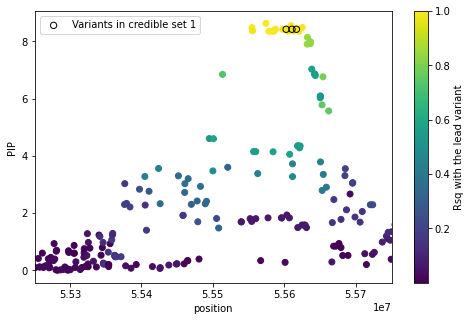

In [52]:
plt.figure(figsize=(8,5))
p=plt.scatter(df["POS"],df["MLOG10P"],c=ld[df["P"].idxmin()]**2)
plt.scatter(df.loc[df[df["cs"]==1].index,"POS"],df.loc[df[df["cs"]==1].index,"MLOG10P"],
           marker='o',s=40,c="None", edgecolors='black',label="Variants in credible set 1")
plt.colorbar( p , label="Rsq with the lead variant")
plt.xlabel("position")
plt.xlim((55250614, 55750614))
plt.ylabel("PIP")
plt.legend()